# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.


### Brief Description and Questions Regarding the Data

The dataset we have decided to use is the [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction). Alongisde this, the dataset I have decided to use in relation to our provided dataset is about the air quality in India from the years 2015-2019. This dataset can be found here: [India Air Quality](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india). The dataset I have found provides detailed statistics regarding the various Air Qualities across different cities in India. After Reviewing the data, here are a few questions I hope to be able to answer after full exploration of the two datasets:

- Can we create a combination of variables between the two datasets to accurately create an estimate of flight cost?
- Can we predict an accurate flight cost estimate based on the Air Quality Index?
- How does the number of flights contribute to Air Quality Index?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv('flights.csv')
air_df = pd.read_csv('city_day.csv')
flights_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Unnamed: 11,Unnamed: 12
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,NaN,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN,NaN


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

As we can see from the head of the data above, we have two unnamed columns filled with NaN. Let's see if we have anything in these columns.

In [3]:
print(flights_df.value_counts("Unnamed: 11"))
print(flights_df.value_counts("Unnamed: 12"))

Series([], dtype: int64)
Series([], dtype: int64)


As we can see, we have nothing in these columns so let's go ahead and remove them.

In [4]:
flights_df=flights_df.drop("Unnamed: 11", axis=1)
flights_df=flights_df.drop("Unnamed: 12", axis=1)
flights_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [5]:
air_df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Now that we have cleaned that part of our data up. Let's analyze the dimensions of our dataframes.

In [6]:
print("Shape of Air Quality Dataframe::{}".format(air_df.shape))
print("Shape of Flights Dataframe::{}".format(flights_df.shape))

Shape of Air Quality Dataframe::(29531, 16)
Shape of Flights Dataframe::(10683, 11)


Now let's see the datatypes we're dealing with.

In [7]:
print("Flights Dataframe:\n", flights_df.dtypes, "\n\nAir Quality Dataframe:\n", air_df.dtypes, "\n\n")

Flights Dataframe:
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional Info    object
Price               int64
dtype: object 

Air Quality Dataframe:
 City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object 




Now, let's take a look at the span of years between the datasets. While we are at it, we should convert both flights_df.Date_of_Journey to pandas' datetime as well as air_df.Date for ease of combination later on.

In [8]:
flights_df['datetime'] = pd.to_datetime(flights_df.Date_of_Journey)
air_df['datetime'] = pd.to_datetime(air_df.Date)

print("Min year Flights: ", min(flights_df.datetime), "\nMax year Flights: ", max(flights_df.datetime), '\n')
print("Min year Air Quality: ", min(air_df.Date), "\nMax year Air Quality: ", max(air_df.Date))


Min year Flights:  2019-01-03 00:00:00 
Max year Flights:  2019-12-06 00:00:00 

Min year Air Quality:  2015-01-01 
Max year Air Quality:  2020-07-01


As we can see from the years provided above, the first flight entry is in 2019 while the first air quality entry is in 2015. This is important because we will need to trim our data down just into the year 2019. Let's go ahead and do that now.

In [9]:
air19_df = air_df
air19_df = air19_df.loc[air19_df['Date'] > '2018-12-31']
air19_df = air19_df.loc[air19_df['Date'] < '2020-01-01']

print("Shape of New Air Quality Dataframe::{}".format(air19_df.shape), '\n')
print("Min Date: ", min(air19_df.Date), "\nMax Date: ", max(air19_df.Date))

Shape of New Air Quality Dataframe::(7446, 17) 

Min Date:  2019-01-01 
Max Date:  2019-12-31


Done! Lastly, let's see if we have any missing values we need to take care of. We will start with our flights dataframe.

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  datetime         10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB


Out of 10,683 entries only two of our columns do not contain full values. However, they are only missing one value and these variables will not be used by us in the future so we will leave them for now. Let's see the Air Quality dataframe.

In [11]:
air19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 1461 to 29347
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        7446 non-null   object        
 1   Date        7446 non-null   object        
 2   PM2.5       7136 non-null   float64       
 3   PM10        6147 non-null   float64       
 4   NO          7229 non-null   float64       
 5   NO2         7176 non-null   float64       
 6   NOx         6945 non-null   float64       
 7   NH3         5943 non-null   float64       
 8   CO          7105 non-null   float64       
 9   SO2         7118 non-null   float64       
 10  O3          7209 non-null   float64       
 11  Benzene     6439 non-null   float64       
 12  Toluene     5063 non-null   float64       
 13  Xylene      2752 non-null   float64       
 14  AQI         7071 non-null   float64       
 15  AQI_Bucket  7071 non-null   object        
 16  datetime    7446 non

As we can see, we have many missing values. Since we are lucky and every attribute we will be looking at later for correlations, we can simply insert a 0 in place of NaN. Let's do that now.

In [12]:
air19_df["NO"].fillna(0, inplace=True)
air19_df["PM2.5"].fillna(0, inplace=True)
air19_df["PM10"].fillna(0, inplace=True)
air19_df["NO2"].fillna(0, inplace=True)
air19_df["NOx"].fillna(0, inplace=True)
air19_df["CO"].fillna(0, inplace=True)
air19_df["SO2"].fillna(0, inplace=True)
air19_df["O3"].fillna(0, inplace=True)
air19_df["Benzene"].fillna(0, inplace=True)
air19_df["Toluene"].fillna(0, inplace=True)
air19_df["Xylene"].fillna(0, inplace=True)
air19_df["NH3"].fillna(0, inplace=True)
air19_df["AQI"].fillna(0, inplace=True)

air19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 1461 to 29347
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        7446 non-null   object        
 1   Date        7446 non-null   object        
 2   PM2.5       7446 non-null   float64       
 3   PM10        7446 non-null   float64       
 4   NO          7446 non-null   float64       
 5   NO2         7446 non-null   float64       
 6   NOx         7446 non-null   float64       
 7   NH3         7446 non-null   float64       
 8   CO          7446 non-null   float64       
 9   SO2         7446 non-null   float64       
 10  O3          7446 non-null   float64       
 11  Benzene     7446 non-null   float64       
 12  Toluene     7446 non-null   float64       
 13  Xylene      7446 non-null   float64       
 14  AQI         7446 non-null   float64       
 15  AQI_Bucket  7071 non-null   object        
 16  datetime    7446 non

Now that our data is ready, we can begin describing it and getting into the merging.

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable.

#### Flights Data Dictionary

| Column Position | Attribute Name  | Definition  | Data Type  | Example   |
|:---:|:-:|:-:|:-:|:-:|---|---|---|
| 1    | Airline  | Name of the Airline  | string  | IndiGo  |
|  2   | Date_of_Journey  | The date the journey takes place  | string  | 1/05/2019  |
|   3  |  Source | The city where the journey starts off from  | string   | Delhi   |
|   4  | Destination  | The city where the journey ends  | string  | Cochin   |
|  5   |  Route | The full abbreviated route of the journey (Contains all flights in the journey)   | string  | BLR → DEL  |
|   6  | Dep_Time  | The time the flight departs the source terminal  | string   | 22:20  |
|  7   | Arrival_Time  | The time the flight arrives at the destination terminal  | string   | 13:15  |
|  8   | Duration  | Total time of the journey  | string  | 7h 25m  |
|   9  | Total_Stops  | Number of stops at different airports  | string  | non-stop  |
| 10    | Additional Info  | Other necessary information about the journey  | string  | In-flight meal not included   |
|   11  | Price  | Total price of the journey  | int64  | 6219  |
|     12| datetime  | Converted Date_of_Journey into standard 'pandas datetime'  | datetime64\[ns]  |  2019-01-06 |

---

#### 2019 Air Quality Data Dictionary

| Column Position | Attribute Name  | Definition  | Data Type  | Example   | Min | Max | Median |
|:---:|:-:|:-:|:-:|:-:|---|---|---|
| 1    | City  | Name of the city in India  | string  | Delhi  |N/A | N/A |N/A |
| 2    | Date  | Date the data was recorded  | string  | 2019-01-01  | 2019-01-01|2019-12-31 |2019-07-16 00:00:00 |
| 3    | PM2.5  | Fine Particles size 2.5   | float64  | 110.71  |0.0 |917.77 |42.37 |
| 4    | PM10  | Particulate Matter  | float64  | 23.45  | 0.0 |1000.0|73.33 |
| 5    | NO  | Nitrogen Monoxide  | float64  | 5.66  |0.0 |273.39 |10.055 |
| 6    | NO2  | Nitrogen Monoxide  | float64  | 13.45  | 0.0| 292.02| 19.81|
| 7    | NOx  | Nitric Oxide  | float64  | 8.64  |0.0  |293.1 | 24.96|
| 8    | NH3  | Ammonia  | float64  | 8.88  |0.0 |207.14 |9.635 |
| 9    | CO  | Carbon Monoxide  | float64  | 0.09  |0.0 |119.68 |0.89 |
| 10    | SO2  | Sulfur Dioxide  | float64  | 0.67  |0.0 |186.08 | 9.96 |
| 11    | O3  | Ozone  | float64  | 9.87  |0.0 |162.43 |28.82 |
| 12    | Benzene  | Chemical that is a colorless or light yellow liquid at room temperature  | float64  | 67.8  |0.0 |299.61 |0.88 |
| 13    | Toluene  | A clear, colorless liquid which becomes a vapor when exposed to air at room temperature  | float64  | 89.9  |0.0 |371.65 | 1.56 |
| 14   | Xylene  | A colorless, flammable liquid with a sweet odor  | float64  | 76.78  | 0.0| 170.37| 0.0 |
| 15    | AQI  | Air Quality Index  | float64  | 1000.0  | 0.0| 1719.0 | 106.0|
| 16    | AQI_Bucket  | Category classification system for Air Quality Index | string  | Severe  | N/A |N/A | N/A|
| 17    | datetime  | converted Date to datetime  | datetime64\[ns]| 2019-01-01 00:00:00  | 2019-12-31 00:00:00 |2019-07-16 00:00:00 |2019-07-16 00:00:00 |


In [13]:
# Here is the pandas code for the different attributes within flights_df and air19_df
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  datetime         10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB


In [14]:
air19_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 1461 to 29347
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        7446 non-null   object        
 1   Date        7446 non-null   object        
 2   PM2.5       7446 non-null   float64       
 3   PM10        7446 non-null   float64       
 4   NO          7446 non-null   float64       
 5   NO2         7446 non-null   float64       
 6   NOx         7446 non-null   float64       
 7   NH3         7446 non-null   float64       
 8   CO          7446 non-null   float64       
 9   SO2         7446 non-null   float64       
 10  O3          7446 non-null   float64       
 11  Benzene     7446 non-null   float64       
 12  Toluene     7446 non-null   float64       
 13  Xylene      7446 non-null   float64       
 14  AQI         7446 non-null   float64       
 15  AQI_Bucket  7071 non-null   object        
 16  datetime    7446 non

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [15]:
df1 = flights_df
df2 = air19_df

res = df1.merge(df2, left_on=['datetime', 'Source'], right_on=['datetime', 'City'])
print(res.shape)

corrmatrix = res.corr()
corrmatrix["Price"].sort_values(ascending=False)

(8486, 28)


Price      1.000000
Toluene    0.258221
PM10       0.168896
NH3        0.130694
AQI        0.128755
NO2        0.090657
PM2.5      0.088246
Xylene     0.065017
O3         0.048288
SO2        0.042535
CO         0.025537
Benzene    0.005729
NOx       -0.025415
NO        -0.033213
Name: Price, dtype: float64

While this correlation matrix is helpful in seeing correlations between our attributes and "Price," we also want to see correlations to other attributes. Let's use a heatmap to accomplish this.

<AxesSubplot:>

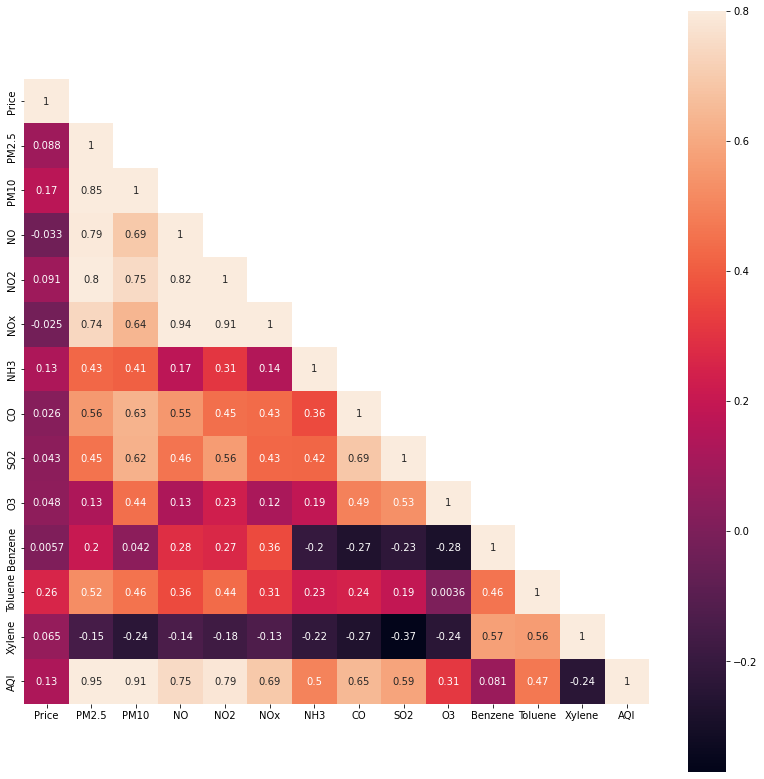

In [16]:
import numpy as np

plt.figure(figsize=(14, 14))
mask = np.array(corrmatrix)

mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrmatrix, mask=mask,
            vmax=.8, square=True,annot=True)

Now we are able to see correlations across each one of our many attributes. This will be helpful in deciding which attributes to use for our predictor variables later on.

However, before we do that let's try and see if we can't combine some attributes to achieve some more positive correlations.

In [17]:
res['total_chems'] = res['NO'] + res['PM2.5']\
                     + res['PM10'] + res['NO2']\
                     + res['CO'] + res['SO2']\
                     + res['O3'] + res['Benzene']\
                     + res['Toluene'] + res['Xylene']\
                     + res['NOx'] + res['NH3']

res['nitrogen_base'] = res['NO'] + res['NO2'] + res['NH3'] + res['NOx']
res['other_gas'] = res['Xylene'] + res['Benzene'] + res['Toluene']
res['particles'] = res['PM10'] + res['PM2.5']

new_corr_matrix = res.corr()
new_corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Toluene          0.258221
other_gas        0.189233
PM10             0.168896
particles        0.143458
NH3              0.130694
AQI              0.128755
total_chems      0.118997
NO2              0.090657
PM2.5            0.088246
Xylene           0.065017
O3               0.048288
SO2              0.042535
nitrogen_base    0.032364
CO               0.025537
Benzene          0.005729
NOx             -0.025415
NO              -0.033213
Name: Price, dtype: float64

As we can see we get some more positive correlations by combining various attributes. Let's see the heat map one more time.

<AxesSubplot:>

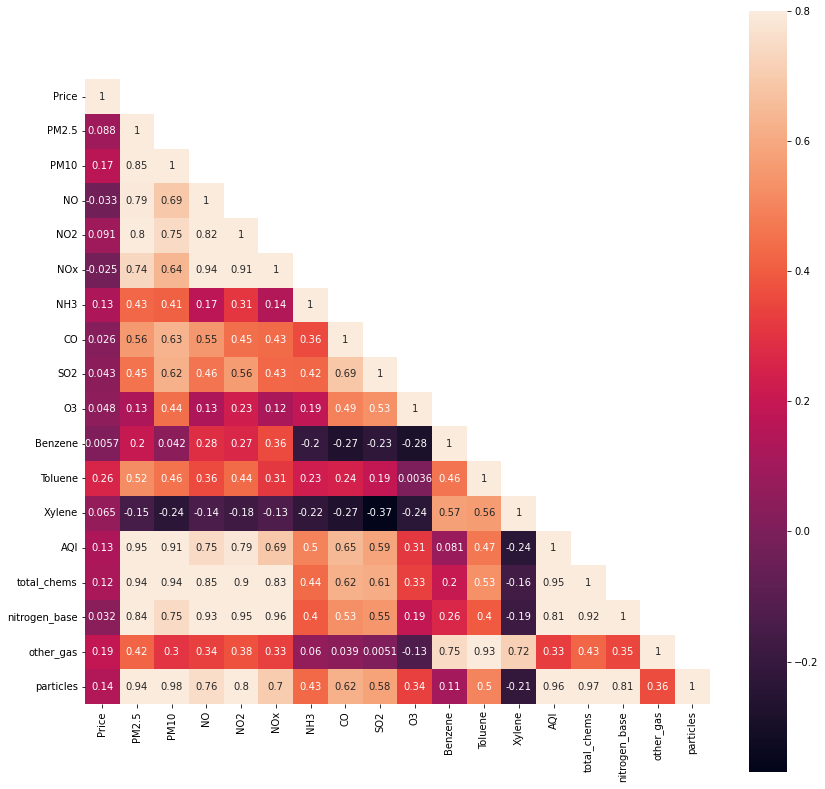

In [18]:
import numpy as np

plt.figure(figsize=(14, 14))
mask = np.array(new_corr_matrix)

mask[np.tril_indices_from(mask)] = False
sns.heatmap(new_corr_matrix, mask=mask,
            vmax=.8, square=True,annot=True)

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

### Relationships

- Target Variable: __Price__
- Predictor Variables: AQI, other_gas, nitrogen_base, Toluene, particles, total_chems, and PM10

We chose these variables as such because we wanted to see if the price of airfare is somehow related to air quality. With this in mind, our target variable we set as "Price" and the rest as predictors.

The other variables we want to briefly go into detail about are: "other_gas, nitrogen_base, total_chems, and particles." These are the variables that we ultimately decided to combine as we thought we could achieve greater correlation values. Firstly, the "other_gas" variable is a combination of Xylene, Toulene, and Benzene. We noticed that Toluene had the highest positive correlation to "Price" so we wanted to see if we could get something greater. Secondly, "nitrogen_base" is a combination of NO, NO2, and NOx. Thirdly, "total_chems" is the sum of each gas. Lastly, "particles" are the particulate matters PM2.5 and PM10. With this in mind as well as the rest of our predictors, let's make some plots and explore the relationships between variables.


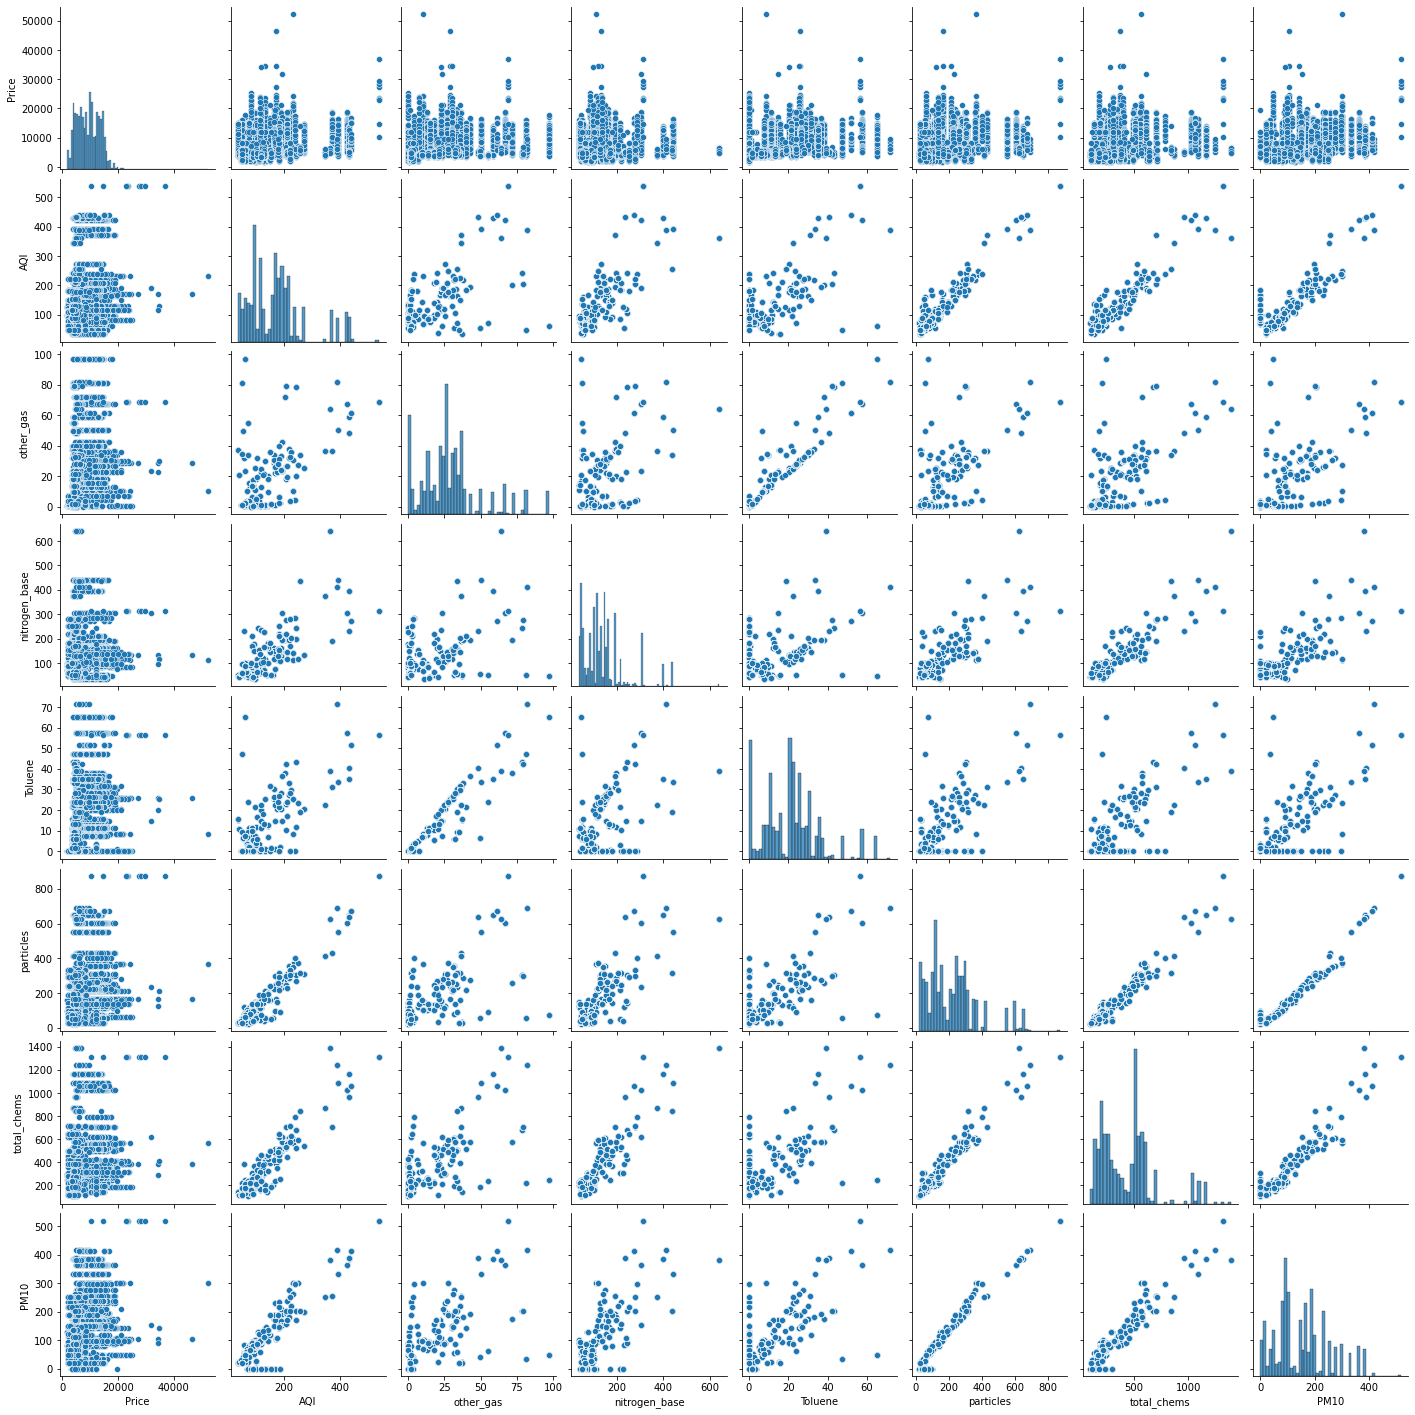

In [19]:
attributes = ["Price", "AQI", "other_gas","nitrogen_base", "Toluene", "particles", "total_chems", "PM10"]
sns.pairplot(res[attributes])

__Scatter Matrix__

The provided scatter matrix is helpful in seeing on first glance which variables we would like to explore further or even combine to help our case of creating an accurate prediction. From this plot, we can begin to make assumptions on which variables are correlated in some way and which are not.

We can also see how each predictor stacks up with price and can explore there relationships individually if we so choose. If we look at column 1, each row depicts the given predictor variable plotted against "Price." Unfortunately, we get some really poor correlations and nothing to really go off of. We expected some better results and there is no obvious visual correlation.


### Exploring Relationships Between Predictors

Although our predictors did not yield any visually obvious correlations, we can still examine relationships between a few predictor variables.


To identify any possible relationships, we can create another scatter matrix with only our predictors. This will allow us to initially identify any and all relationships between predictors.

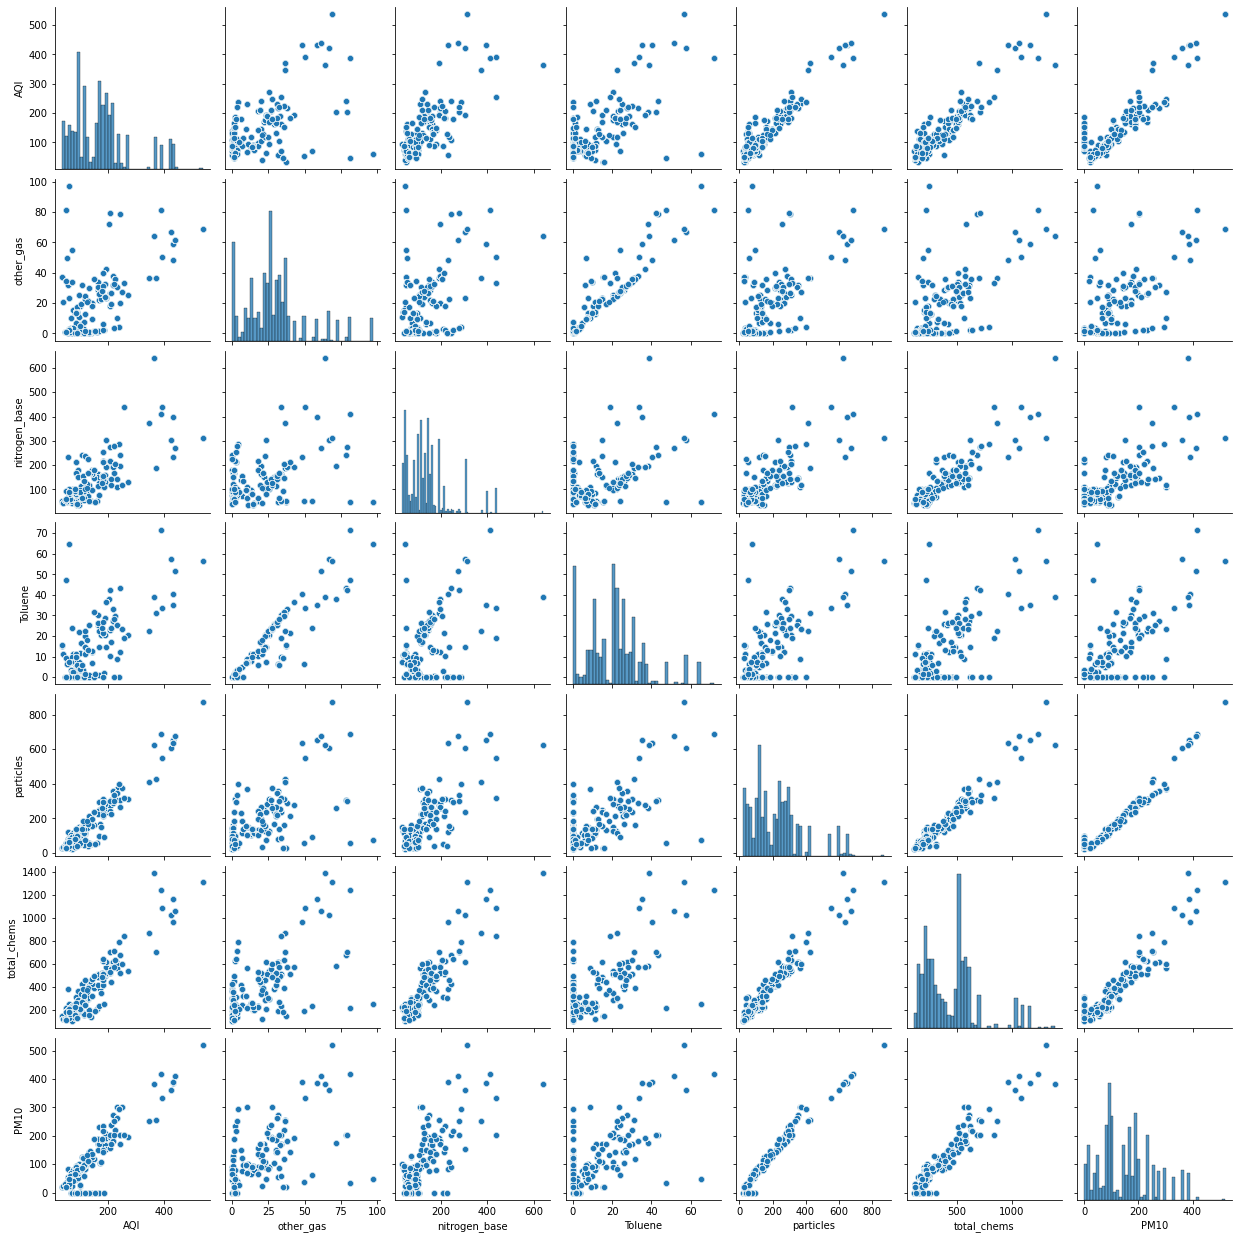

In [22]:
predictors = ["AQI", "other_gas","nitrogen_base", "Toluene", "particles", "total_chems", "PM10"]
sns.pairplot(res[predictors])

From this plot, we can see all possible combinations of predictor variables and how they stack up to one another in terms of correlation. Let's take a closer look at a few of these to get a better understanding at how the predictors relate to one another.


__AQI vs Particles__

The first pair we want to look at is Air Quality Index vs Particle Matter Gases.

<AxesSubplot:xlabel='AQI', ylabel='particles'>

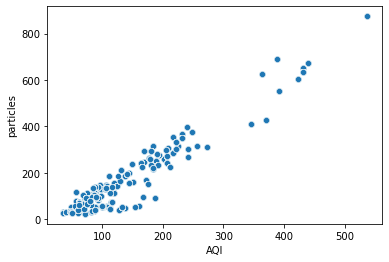

In [20]:
sns.scatterplot(data=res, x="AQI", y="particles")

As we can see, if we were to create a best fit line, we can see these are pretty linearly correlated to one another as one would expect. This is because AQI is a composite of various gases including the particulate matter gases.

__Nitrogen Base vs Particles__

The next pair we will look at is the "nitrogen_base" attribute versus "particles."

<AxesSubplot:xlabel='nitrogen_base', ylabel='particles'>

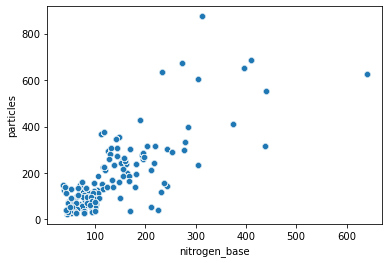

In [21]:
sns.scatterplot(data=res, x="nitrogen_base", y="particles")

Although not as great a fit as "AQI" and "particles," this is still not all that bad. We can see a clear clustering of data and could attempt to create a line of best fit given this data. Although a few outliers exist, a relatively linear correlation can be seen from this plot.

__Nitrogen Base vs Total Chems__

The last pair we want to take a look at is "nitrogen_base" versus "total_chems." Obviously, we expect a correlation between the two and can make an assumption that they are in fact correlated. However, in science we cannot make assumptions as we must be precise. So let's create a plot to see the data relation.

<AxesSubplot:xlabel='nitrogen_base', ylabel='total_chems'>

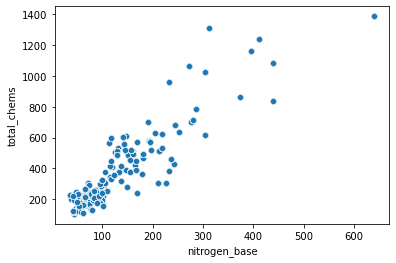

In [23]:
sns.scatterplot(data=res, x="nitrogen_base", y="total_chems")

Again, we see a very linear scattering as we expected initially. If we wanted to create a best fit line out of this graph, it would be almost completely linear.

### Concluding Remarks Regarding Bivariate Relations
As we can see from all the plots we have created, we did not achieve a solid enough correlation between "Price" and the rest of our predictor variables. With that being said, all of our correlations we did identify are positively correlated which means each contributes in a way to the variable it is correlated to.

## Things To Reflect On

This is an additional section we wanted to add on to this project because there are a few things we wanted to talk about and reflect on from this project. In this section we will look back at problems we faced, initial ideas we had and the rationale behind them, what worked, and what did not.

To start, we would like to talk about the initial idea we had going into this. Upon choosing the airfare dataset, we started thinking about what relates to air travel. We considered doing gas prices, food prices, snack sales, etc. We noticed then that all flights in this dataset were India based so we explored more into India datasets that we could try to relate to airfare. Eventually, we stumbled onto this Air Quality dataset which we thought was perfect for what we were trying to do. We wanted to explore any correlations between the air quality and flight price. Our thought here was to see if somehow, someway, price was related to air quality.

This idea brings us into our next point regarding the various problems we faced when trying to work with these datasets. Starting out, we examined each dataset and wanted to identify any attributes we could potentially relate together. We were also thinking about how we were going to merge the data together in a way that could aid us in finding any correlations between the data. Our initial problem we faced was attempting to merge the data based on date. We realized this joined unrelated air quality of other cities in India with each other city because it was all based on the same day. From here we decided to merge the two datasets based on time AND "Source" city. Our problem here, however, is leaving out destination cities that could potentially be important to finding correlations and providing more accurate data. Without a clear workaround, we continued our analysis of the datasets with the newly joined information.

From here, we discovered a couple of things. The first being that the correlation was not nearly as great as we had hoped. As seen above by the various plots, print outs, and statistics, we achieved a greatest correlation of around 0.25. We expected better but remembered the idea shared in class that stated correlations of 0.6 or 0.8 are rather unrealistic and that it would be a "miracle" even if we got a correlation that great. With this idea helping us cope with our poor correlations, we formulated any relations we could. What worked for us was being able to visualize, through the use of seaborn plots, the various correlations not only with a certain attribute and price, but attributes to other attributes. We tried combining variables to see if we could achieve greater correlations which we could add to my list of "predictor variables."

Although we did not achieve the success we expected, it was still interesting to see how even things like Nitrogen Monoxide, particle gases, and other atmospheric gases have correlations to something so unrelated as airfare.